<a href="https://colab.research.google.com/github/bhadreshpsavani/TimeSerierAnalysisOnCoalConsumption/blob/main/TimeSeriesForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Python
import pandas as pd
from prophet import Prophet

In [20]:
# Python
df = pd.read_csv('gold.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


In [21]:
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']
df

,ds,y
0,2000-01-04,283.7
1,2000-01-05,282.1
2,2000-01-06,282.4
3,2000-01-07,282.9
4,2000-01-10,282.7
...,...,...
5698,2022-08-29,1749.7
5699,2022-08-30,1736.3
5700,2022-08-31,1726.2
5701,2022-09-01,1709.3


In [17]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lri_dyk/89rhqvo7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6lri_dyk/2xd_u_td.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19499', 'data', 'file=/tmp/tmp6lri_dyk/89rhqvo7.json', 'init=/tmp/tmp6lri_dyk/2xd_u_td.json', 'output', 'file=/tmp/tmp6lri_dyk/prophet_modelzogh_kju/prophet_model-20230106070140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
# Python
future = m.make_future_dataframe(periods=360)
future.tail()

,ds
6058,2023-08-24
6059,2023-08-25
6060,2023-08-26
6061,2023-08-27
6062,2023-08-28


In [22]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6063,2023-08-29,2150.987461,2032.818034,2258.957424
6064,2023-08-30,2152.027408,2024.462309,2264.885014
6065,2023-08-31,2153.136871,2041.955721,2267.623960
6066,2023-09-01,2154.291194,2031.867103,2268.408009
6067,2023-09-02,2157.649052,2041.945052,2278.291832


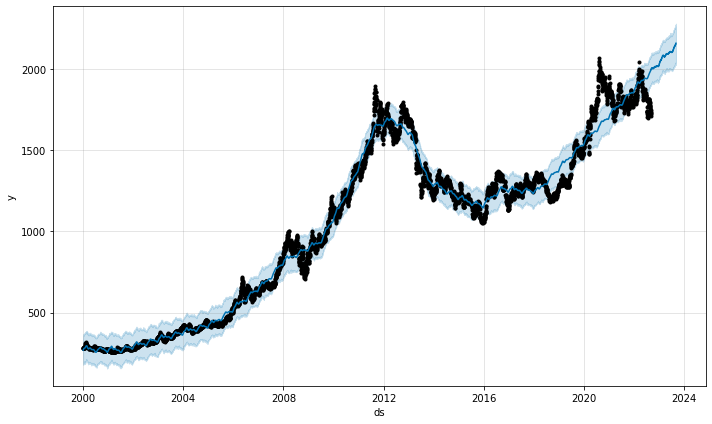

In [23]:
# Python
fig1 = m.plot(forecast)

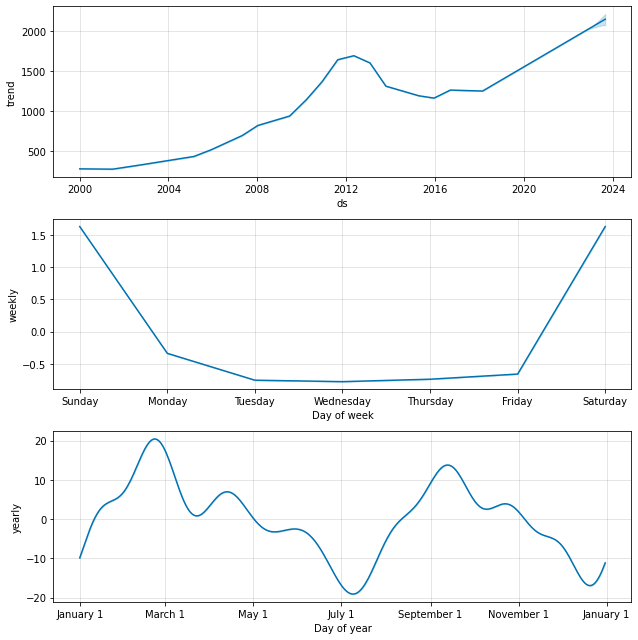

In [24]:
# Python
fig2 = m.plot_components(forecast)

In [25]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [10]:
# Python
plot_components_plotly(m, forecast)